### Multiple Linear Regression on media dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
media = pd.read_csv("pds-mediacompany.csv")
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [3]:
media = media.drop('Unnamed: 7', axis = 1)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [4]:
media['Date'] = pd.to_datetime(media['Date'])
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [5]:
from datetime import date
d0 = pd.Timestamp(2017,2,28)
d1 = media.Date
days = d1 - d0
media['days'] = days

In [6]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [7]:
media['days'] = media['days'].astype(str)
media['days'] = media['days'].map(lambda x: x[0:2])
media['days'] = media['days'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


<AxesSubplot:xlabel='days'>

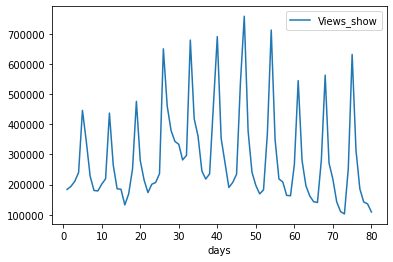

In [8]:
media.plot.line(x = 'days', y = 'Views_show')

In [9]:
media['day_of_week'] = media['Date'].dt.dayofweek
media['day_of_week']

0     2
1     3
2     4
3     5
4     6
     ..
75    0
76    1
77    2
78    3
79    4
Name: day_of_week, Length: 80, dtype: int64

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='day_of_week', ylabel='Views_show'>

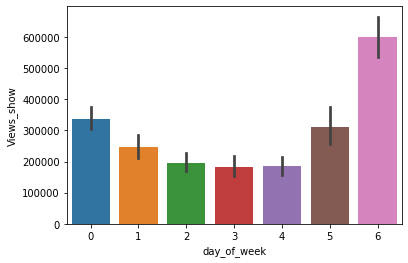

In [11]:
import seaborn as sns
sns.barplot(data = media, x = 'day_of_week', y = 'Views_show')

In [12]:
di = {6:1, 5:1, 4:0, 3:0, 2:0, 1:0, 0:0}
media['weekend'] = media['day_of_week'].map(di)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,day_of_week,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,4,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,5,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,6,1


<AxesSubplot:xlabel='weekend', ylabel='Views_show'>

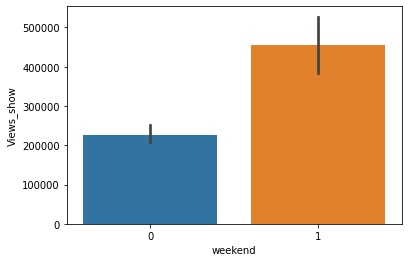

In [13]:
sns.barplot(data = media, x = 'weekend', y = 'Views_show')

<AxesSubplot:xlabel='days'>

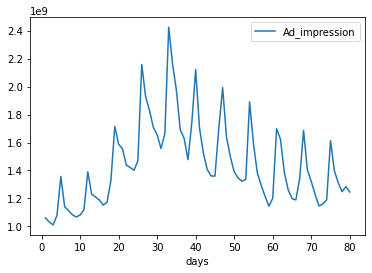

In [14]:
media.plot.line(x = 'days', y = 'Ad_impression')

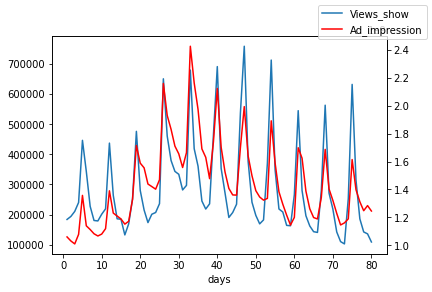

In [15]:
ax = media.plot.line(x = 'days', y = 'Views_show', legend = False)
ax1 = ax.twinx()
media.plot.line(x = 'days', y = 'Ad_impression', color = 'red',
                ax = ax1, legend = False)
ax.figure.legend()

<AxesSubplot:xlabel='Ad_impression', ylabel='Views_show'>

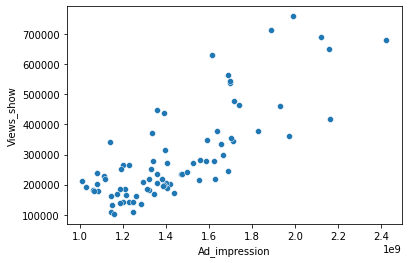

In [16]:
import seaborn as sns
sns.scatterplot(data = media, x = 'Ad_impression', y = 'Views_show')

<AxesSubplot:xlabel='Visitors', ylabel='Views_show'>

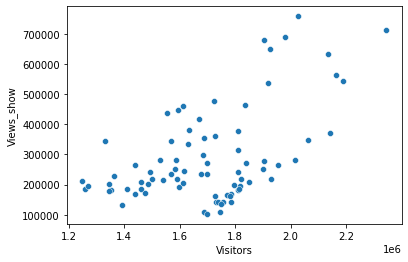

In [17]:
import seaborn as sns
sns.scatterplot(data = media, x = 'Visitors', y = 'Views_show')

In [18]:
X = media[['Visitors', 'weekend']]
y = media['Views_show']
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(X, y)

LinearRegression()

In [19]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm1_1 = sm.OLS(y, X).fit()
print(lm1_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           2.51e-12
Time:                        15:08:58   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

In [20]:
X = media[['Visitors', 'weekend', 'Character_A']]
y = media['Views_show']
import statsmodels.api as sm
X = sm.add_constant(X)
lm2 = sm.OLS(y, X).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           1.53e-14
Time:                        15:08:58   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [21]:
import numpy as np
array = np.arange(12).reshape(3, 4)
print(array)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [22]:
print(np.roll(array, 1))

[[11  0  1  2]
 [ 3  4  5  6]
 [ 7  8  9 10]]


In [23]:
print(media['Views_show'].head())

0    183738
1    193763
2    210479
3    240061
4    446314
Name: Views_show, dtype: int64


In [24]:
media['lag_v'] = np.roll(media['Views_show'], 1)
media['lag_v'].head()      

0    108961
1    183738
2    193763
3    210479
4    240061
Name: lag_v, dtype: int64

In [25]:
media.lag_v[0] = 0


<ipython-input-25-c1452163fccd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media.lag_v[0] = 0


In [26]:
media['lag_v'].head()  

0         0
1    183738
2    193763
3    210479
4    240061
Name: lag_v, dtype: int64

In [27]:
X = media[['Visitors', 'weekend', 'Character_A', 'lag_v']]
y = media['Views_show']
import statsmodels.api as sm
X = sm.add_constant(X)
lm3 = sm.OLS(y, X).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           3.16e-21
Time:                        15:08:58   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

In [28]:
X = media[['weekend', 'Character_A', 'Views_platform']]
y = media['Views_show']
import statsmodels.api as sm
X = sm.add_constant(X)
lm4 = sm.OLS(y, X).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           3.59e-15
Time:                        15:08:58   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

<AxesSubplot:>

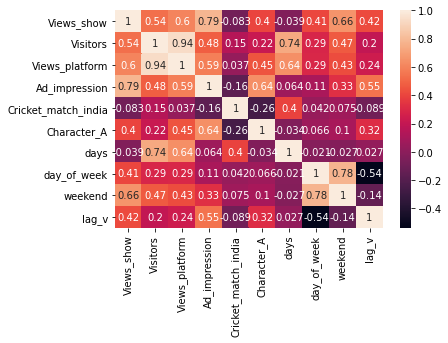

In [29]:
sns.heatmap(media.corr(), annot = True)

In [30]:
X = media[['weekend', 'Character_A', 'Ad_impression']]
y = media['Views_show']
import statsmodels.api as sm
X = sm.add_constant(X)
lm5 = sm.OLS(y, X).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           1.05e-26
Time:                        15:08:59   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [31]:
X = media[['weekend', 'Character_A', 'Ad_impression', 'Cricket_match_india']]
y = media['Views_show']
import statsmodels.api as sm
X = sm.add_constant(X)
lm6 = sm.OLS(y, X).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           1.02e-25
Time:                        15:08:59   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.633e+05    